In [ ]:
import pyforest
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/MRA Analytics.xlsx')
del df['Id']
df.head()

<IPython.core.display.Javascript object>

,Model,Price,Age,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,210,1170


In [ ]:
df['Model'].nunique()

372

In [ ]:
df.shape

(1436, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1436 non-null   object
 1   Price          1436 non-null   int64 
 2   Age            1436 non-null   int64 
 3   KM             1436 non-null   int64 
 4   HP             1436 non-null   int64 
 5   cc             1436 non-null   int64 
 6   Doors          1436 non-null   int64 
 7   Quarterly_Tax  1436 non-null   int64 
 8   Weight         1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB


In [ ]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,283.000000,1615.00000


In [ ]:
df['Model'].value_counts()

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors                       107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors                        83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors                          79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors                         70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors                         43
                                                                         ... 
TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comfort NIEUW AIRCO 4/5-Doors      1
TOYOTA Corolla 1.6 16v VVTi Terra Comfort 2/3-Doors                         1
TOYOTA Corolla 2.0 D 4D Linea Sol 3 Doors 2/3-Doors                         1
TOYOTA Corolla Hatchback 1.6 Terra Comfort 2/3-Doors                        1
TOYOTA Corolla Sw 20D Linea Terra Stationwagen                              1
Name: Model, Length: 372, dtype: int64

In [ ]:
del df['Model']

<IPython.core.display.Javascript object>

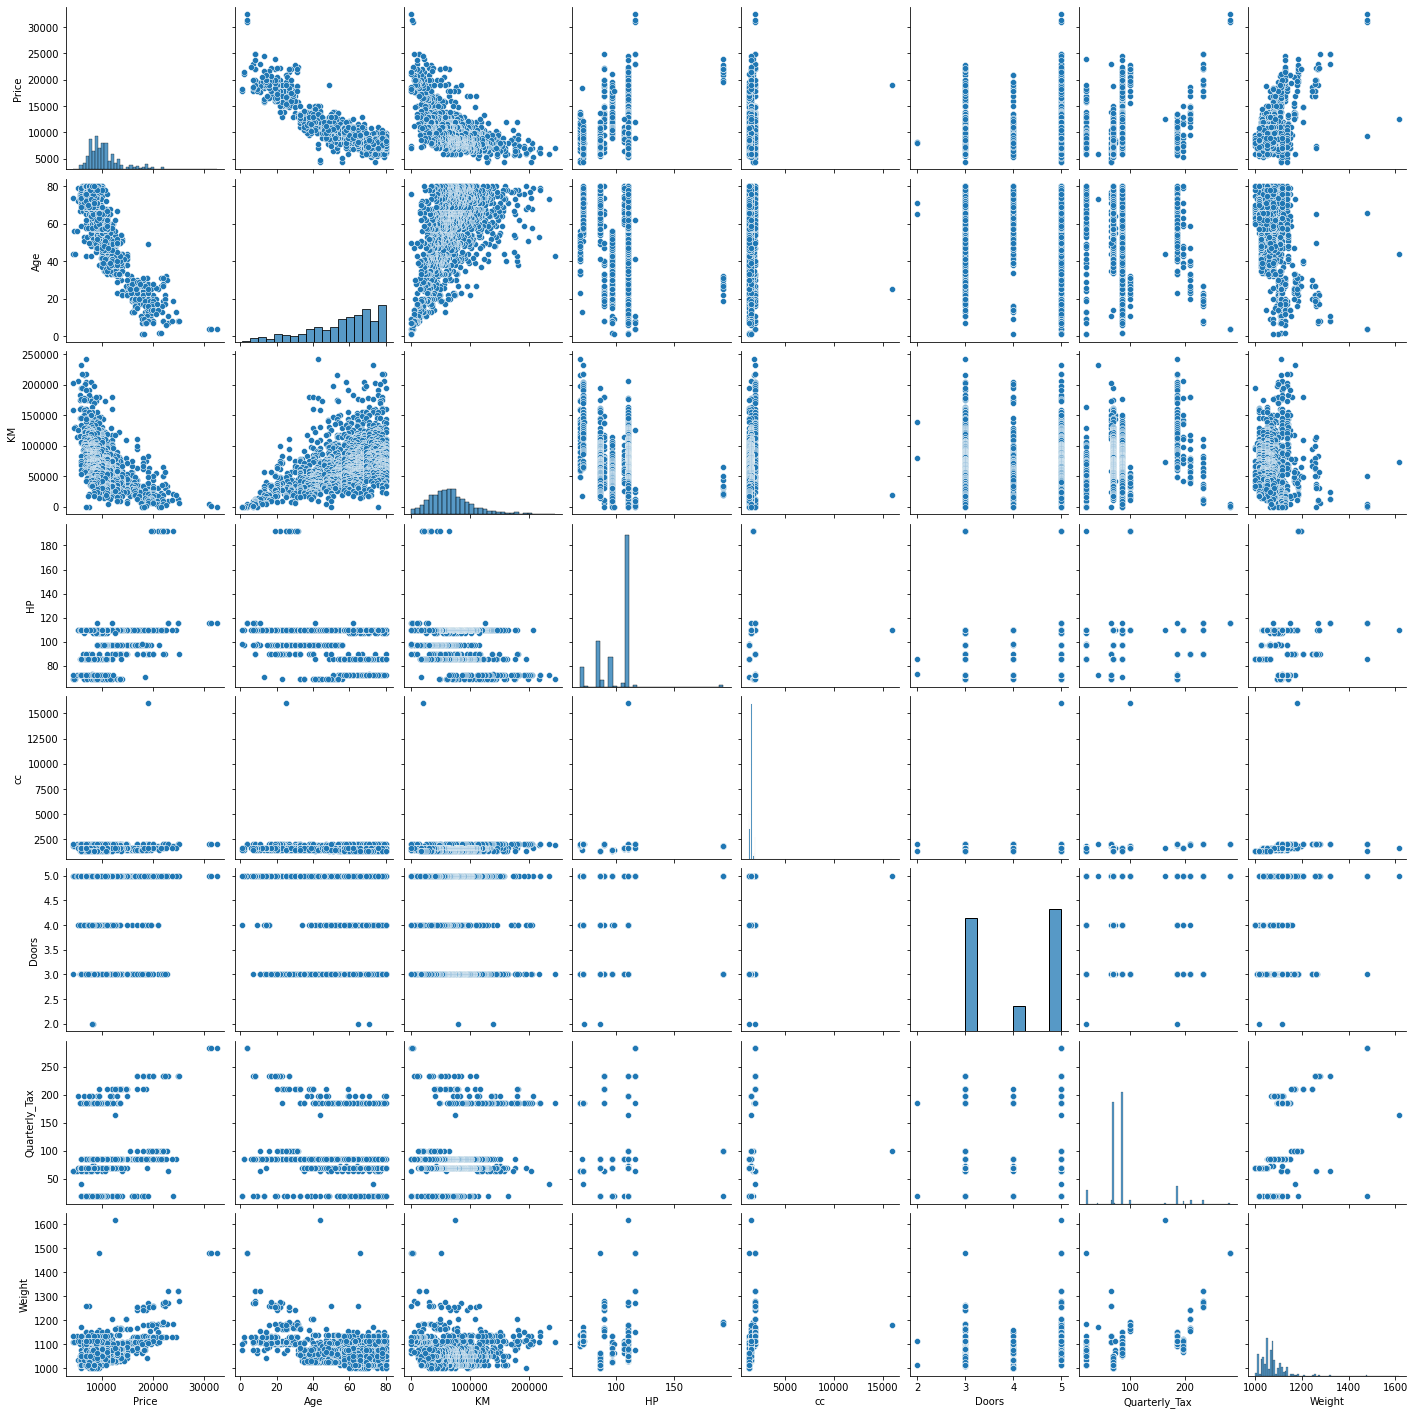

In [ ]:
sns.pairplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

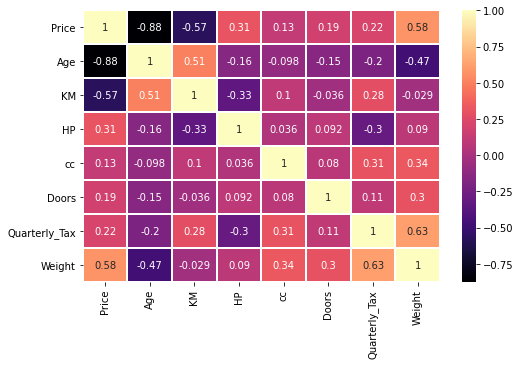

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), linewidths = 1, annot = True, cmap = 'magma')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis = 1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

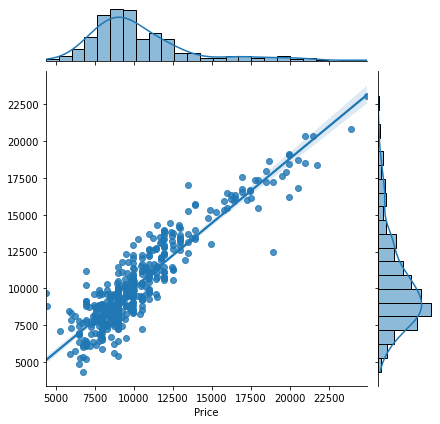

In [ ]:
sns.jointplot(y_test, y_pred, kind = 'reg')

In [ ]:
model.coef_

array([-1.24658865e+02, -2.04465897e-02,  3.43350970e+01, -5.84867354e-02,
       -2.80318314e+01,  5.28295311e+00,  1.61159634e+01])

In [ ]:
model.intercept_

-1909.602757962477

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

<IPython.core.display.Javascript object>

0.8328031781188687

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

1745822.7958919483

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1321.2958774975225